# Task 4

`Add Python and OpenCV libraries`

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

`Read color images.`

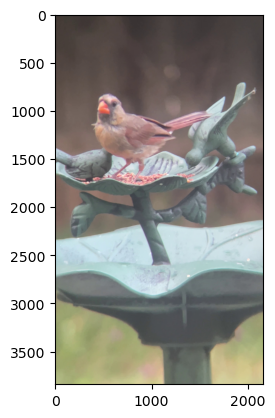

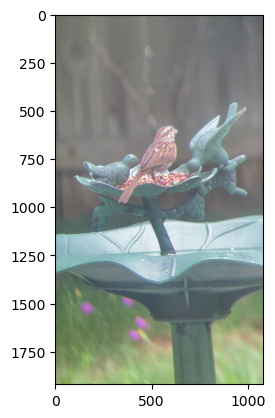

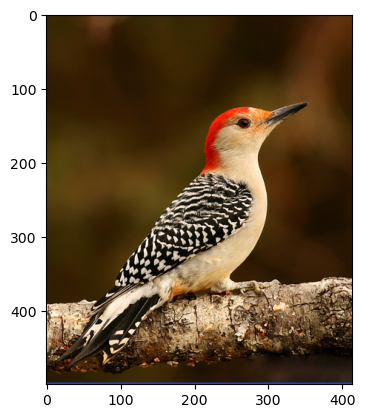

In [37]:
image0_bgr=cv2.imread('image0.jpg')
image0_rgb=cv2.cvtColor(image0_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image0_rgb)
plt.show()

image1_bgr=cv2.imread('image1.jpg')
image1_rgb=cv2.cvtColor(image1_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image1_rgb)
plt.show()

image2_bgr=cv2.imread('image2.jpg')
image2_rgb=cv2.cvtColor(image2_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image2_rgb)
plt.show()

#cv2.imshow("Demo",image0)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

`Display their R,G and B channel images.`

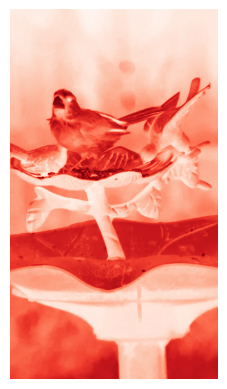

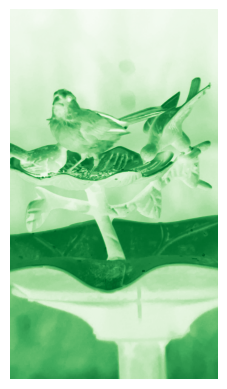

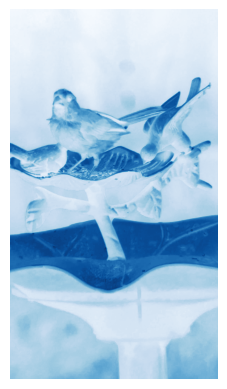

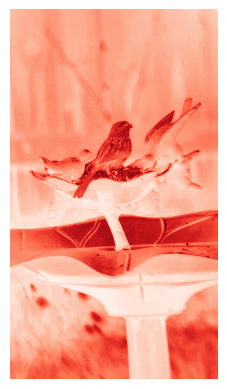

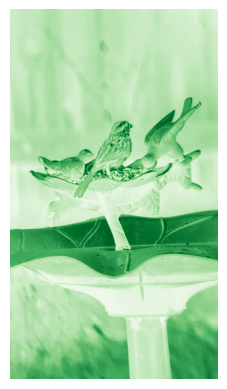

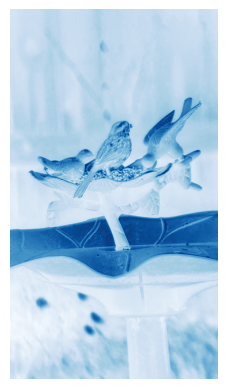

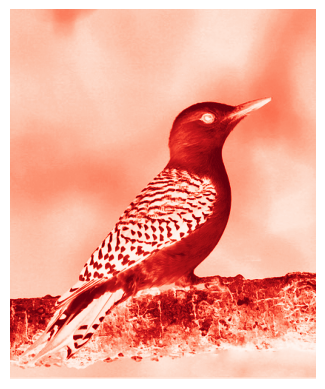

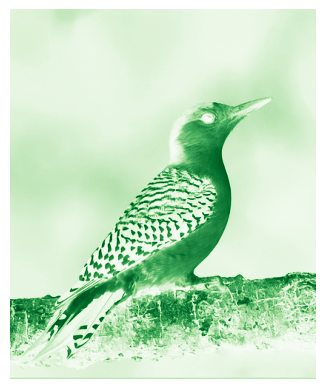

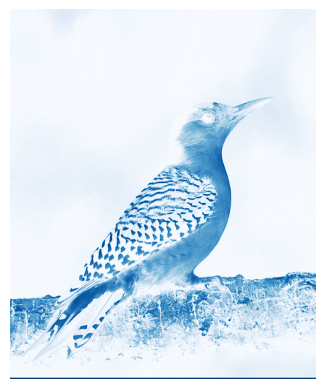

In [38]:
plt.imshow(image0_rgb[:,:,0],cmap='Reds')
plt.axis('off')
plt.show()

plt.imshow(image0_rgb[:,:,1],cmap='Greens')
plt.axis('off')
plt.show()

plt.imshow(image0_rgb[:,:,2],cmap='Blues')
plt.axis('off')
plt.show()

plt.imshow(image1_rgb[:,:,0],cmap='Reds')
plt.axis('off')
plt.show()

plt.imshow(image1_rgb[:,:,1],cmap='Greens')
plt.axis('off')
plt.show()

plt.imshow(image1_rgb[:,:,2],cmap='Blues')
plt.axis('off')
plt.show()

plt.imshow(image2_rgb[:,:,0],cmap='Reds')
plt.axis('off')
plt.show()

plt.imshow(image2_rgb[:,:,1],cmap='Greens')
plt.axis('off')
plt.show()

plt.imshow(image2_rgb[:,:,2],cmap='Blues')
plt.axis('off')
plt.show()

`Converting color image to grayscale and printing their dimentions`

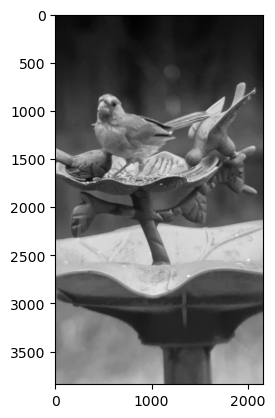

image0:  (3840, 2160)


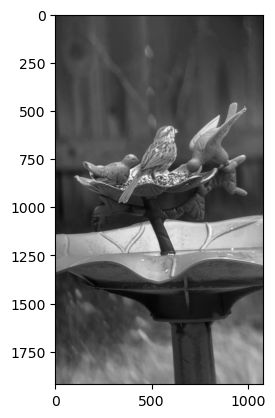

image1:  (1920, 1080)


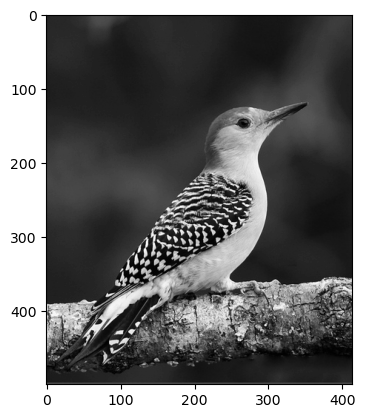

image2:  (500, 413)


In [4]:
# Convert to grayscale.
image0_gscale=cv2.cvtColor(image0_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image0_gscale,cmap=plt.get_cmap('gray'))
plt.show()
print('image0: ',image0_gscale.shape)

image1_gscale=cv2.cvtColor(image1_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image1_gscale,cmap=plt.get_cmap('gray'))
plt.show()
print('image1: ',image1_gscale.shape)

image2_gscale=cv2.cvtColor(image2_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image2_gscale,cmap=plt.get_cmap('gray'))
plt.show()
print('image2: ',image2_gscale.shape)

# Task 5

`Write a function (Python) to resize (reduce) the grayscale images such that the outputdimensions are divisible by 16 without changing their original aspect ratios significantly.`

`You must parametrize the function appropriately to generalize the reduction process.`

`Use this parametric function to reduce (or increase) the size of the grayscale images to have height of 256 pixels – approximately maintain the aspect ratio for the width, but it must be divisible by 16, as well.`

image0 resized: (256, 144)
image1 resized: (256, 144)
image2 resized: (256, 208)


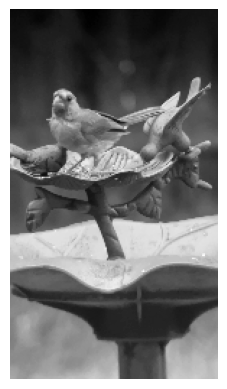

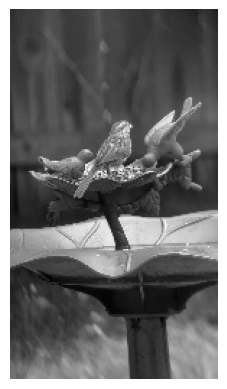

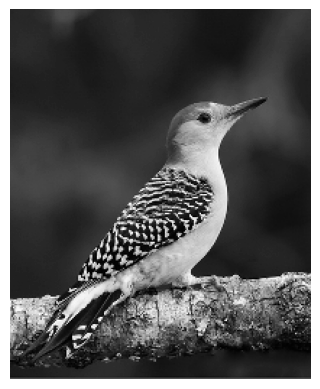

In [39]:
def resize_image(img, target_height=256, interpolation=cv2.INTER_CUBIC):
    original_h, original_w = img.shape # Get original height and width of image
    aspect_ratio=original_w/original_h # Finding the aspect ratio 
    new_width=int(target_height*aspect_ratio) # Calculating new width for image
    new_width=new_width-(new_width%16) # Ensure the new width is divisible by 16
    # Resize the image
    resized_image = cv2.resize(img, (new_width, target_height), interpolation=interpolation)
    return resized_image

image0_resized = resize_image(image0_gscale, target_height=256)
print('image0 resized:', image0_resized.shape)

image1_resized = resize_image(image1_gscale, target_height=256)
print('image1 resized:', image1_resized.shape)

image2_resized = resize_image(image2_gscale, target_height=256)
print('image2 resized:', image2_resized.shape)

# Optionally display the images
plt.imshow(image0_resized, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(image1_resized, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(image2_resized, cmap='gray')
plt.axis('off')
plt.show()

# Task 6

`Write a code to divide each image into blocks of 16x16 pixels and transform them to vectors of size 256.`

`Assign a label to each feature vector with 0, 1, and 2 for the first, second, and third images, respectively.`

`Generate a spreadsheet by storing a feature vector per row in the spreadsheet for each image.`

In [40]:
def image_to_featureVectors(img, label):
    h, w = img.shape
    feature_vectors = []  # Initialize empty list
    
    for r in range(0, h, 16):
        for c in range(0, w, 16):
            block = img[r:r + 16, c:c + 16] # Extract a 16x16 block from the image
            # plt.imshow(block, cmap='gray')
            # plt.axis()
            # plt.show()
            if block.shape == (16, 16): # Check if block size is 16x16 
                feature_vector = block.flatten() # Flatten the block into a 1D vector of size 16*16=256
                #print(feature_vector)
                feature_vectors.append(np.append(feature_vector, label))    
    return feature_vectors

image0_vectors = image_to_featureVectors(image0_resized, label=0)
#print(image0_vectors)
image1_vectors = image_to_featureVectors(image1_resized, label=1)
#print(image1_vectors)
image2_vectors = image_to_featureVectors(image2_resized, label=2)
#print(image2_vectors)

# Combine all feature vectors
all_feature_vectors = image0_vectors + image1_vectors + image2_vectors # feature_space 
# Create a dataFrame 
df=pd.DataFrame(all_feature_vectors)
print(df.shape)
df.to_csv('feature_vectors.csv', index=False)
print("Feature vector created.")
print("Feature vector saved in file: feature_vectors.csv")

(496, 257)
Feature vector created.
Feature vector saved in file: feature_vectors.csv


# Task 7

`Write a code to divide an image into sliding blocks of 16x16 pixels and transform them to feature vectors.`

`Assign a label to each feature vector with 0, 1, and 2 for the first, second, and third images, respectively.`

`Generate a spreadsheet by storing a feature vector per row in the spreadsheet for each image.`

In [41]:
def sliding_window_featureVectors(img, label, block_size=16, step_size = 8):
    h, w = img.shape
    feature_vectors = []  # Initialize empty list
    
    for r in range(0, h-block_size+1, step_size): # step_size is overlap between consecutive block
        for c in range(0, w-block_size+1, step_size):
            block = img[r:r + block_size, c:c + block_size] # Extract a 16x16 block from the image
            # plt.imshow(block, cmap='gray')
            # plt.axis()
            # plt.show()
            feature_vector = block.flatten() # Flatten the block into a 1D vector of size 16*16=256
            feature_vectors.append(np.append(feature_vector, label))    
    return feature_vectors

image0_sw_vectors = sliding_window_featureVectors(image0_resized, label=0,block_size=16, step_size=8)
#print(image0_vectors)
image1_sw_vectors = sliding_window_featureVectors(image1_resized, label=1,block_size=16, step_size=8)
#print(image1_vectors)
image2_sw_vectors = sliding_window_featureVectors(image2_resized, label=2,block_size=16, step_size=8)
#print(image2_vectors)

# Combine all feature vectors
sliding_window_all_feature_vectors = image0_sw_vectors + image1_sw_vectors + image2_sw_vectors
# Create a dataFrame 
sliding_window_df=pd.DataFrame(sliding_window_all_feature_vectors)
print(sliding_window_df.shape)
sliding_window_df.to_csv('sliding_window_feature_vectors.csv', index=False)
print("Sliding Window Feature vector created.")
print("Sliding Window Feature vector saved in file: sliding_window_feature_vectors.csv")

(1829, 257)
Sliding Window Feature vector created.
Sliding Window Feature vector saved in file: sliding_window_feature_vectors.csv


# Task 8

`Extract statistical information (e.g., number of observations, dimension of the data, mean of each feature, etc.) from these datasets. Also, present visual representations (e.g., histogram, scatter plot, etc.) of the data.`

In [42]:
def calculate_image_statistics(img):
    num_observations = img.size
    dimensions = img.shape
    min_value = img.min()
    max_value = img.max()
    mean_value = round(img.mean(), 3)
    std_dev = round(img.std(), 3)
    
    return num_observations, dimensions, min_value, max_value, mean_value, std_dev

# Assuming image0_resized, image1_resized, image2_resized are defined and processed

# Calculate statistics for each image
stats_image0 = calculate_image_statistics(image0_resized)
stats_image1 = calculate_image_statistics(image1_resized)
stats_image2 = calculate_image_statistics(image2_resized)

# Create a DataFrame to hold the statistics
statistics_df = pd.DataFrame({
    'Statistic': ['Number of observations', 'Dimension', 'Min', 'Max', 'Mean', 'Std Dev'],
    'Image 0': stats_image0,
    'Image 1': stats_image1,
    'Image 2': stats_image2
})
statistics_df.set_index('Statistic', inplace=True)
# Display the DataFrame
statistics_df

,Image 0,Image 1,Image 2
Statistic,,,
Number of observations,36864,36864,53248
Dimension,"(256, 144)","(256, 144)","(256, 208)"
Min,52,74,0
Max,246,254,255
Mean,126.809,134.703,65.974
Std Dev,49.264,34.377,55.733


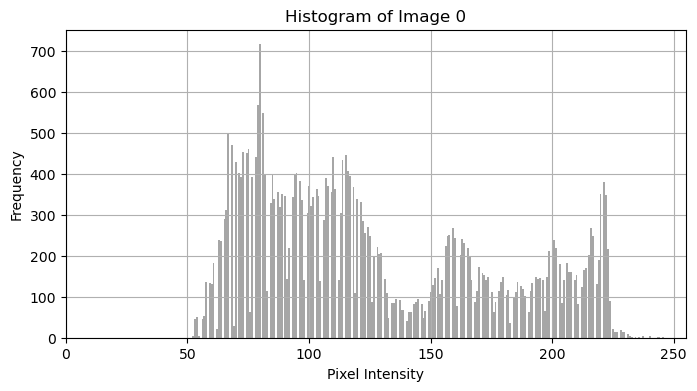

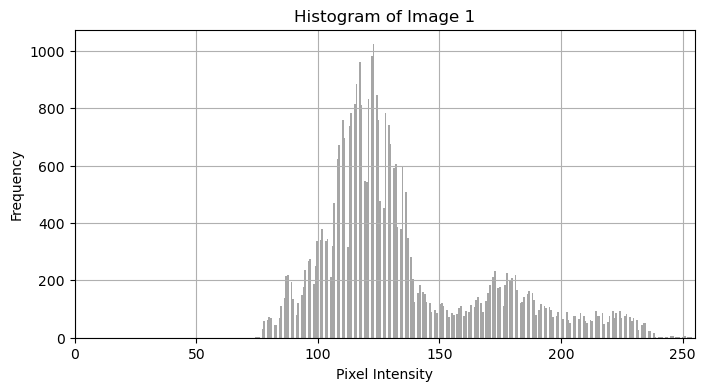

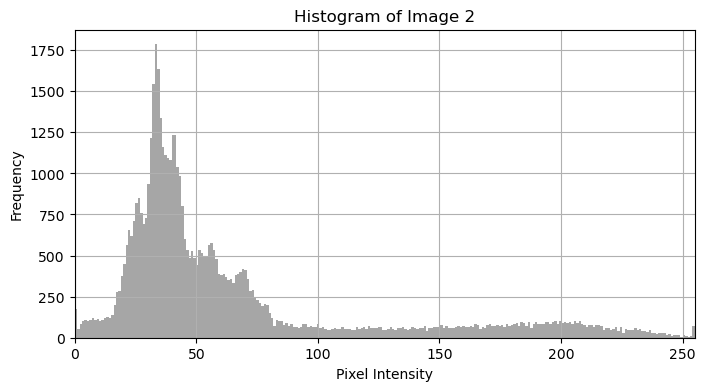

In [43]:
def histogram(img, f):
    plt.figure(figsize=(8, 4))
    plt.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title(f'Histogram of Image {f}')  # Correct way to add variable to the title
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.grid()
    plt.show()
    
# Call the function for each image
histogram(image0_resized, f=0)
histogram(image1_resized, f=1)
histogram(image2_resized, f=2)


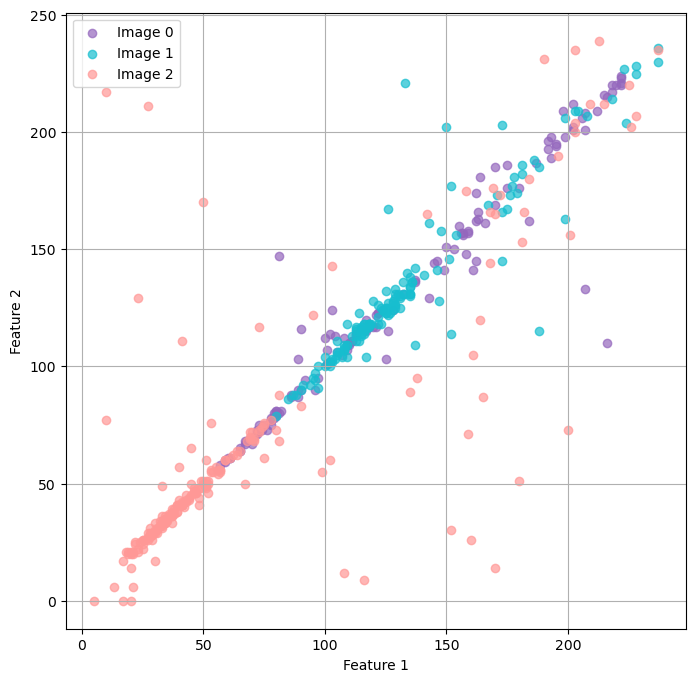

In [44]:
colors = ['#9467bd', '#17becf','#ff9896']
plt.figure(figsize=(8, 8))
for label in range(3):
    class_data = df[df.iloc[:, -1] == label]
    plt.scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], label=f'Image {label}', alpha=0.7, color=colors[label])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

`Answer the following questions -- Is the dataset imbalanced, inaccurate, or incomplete? Is it a trivial data or possibly a big data? Does it have scalability problem? Are they high dimensional? Do you need to standardize? Do you need to normalize? How do they affect the data characteristics?`

**Is the dataset imbalanced, inaccurate, or incomplete?**

**Imbalanced Data**:
- Imbalanced data means the classes are not balanced. That means one or more classes have significantly fewer or more instances than the others.

In [23]:
# Code for calculating class distribution:
join_image_df = pd.read_csv("feature_vectors.csv", header=None)
class_distribution = join_image_df.iloc[:, -1].value_counts()
print(class_distribution)

2      208
0      144
1      144
256      1
Name: 256, dtype: int64


- **Class 0** and **Class 1** have the same number of instances (144 each).
- **Class 2** has 208 instances, which is 64 more than Class 0 and Class 1.
- It **could be considered slightly imbalanced** because there is some variation. The ratio of the largest to smallest class is about **1.44 : 1**. This level of imbalance is relatively mild and may not cause significant problems for many machine learning algorithms

**Incomplete Data:**
- Incomplete data means the incomplete features (missing values in some of features).

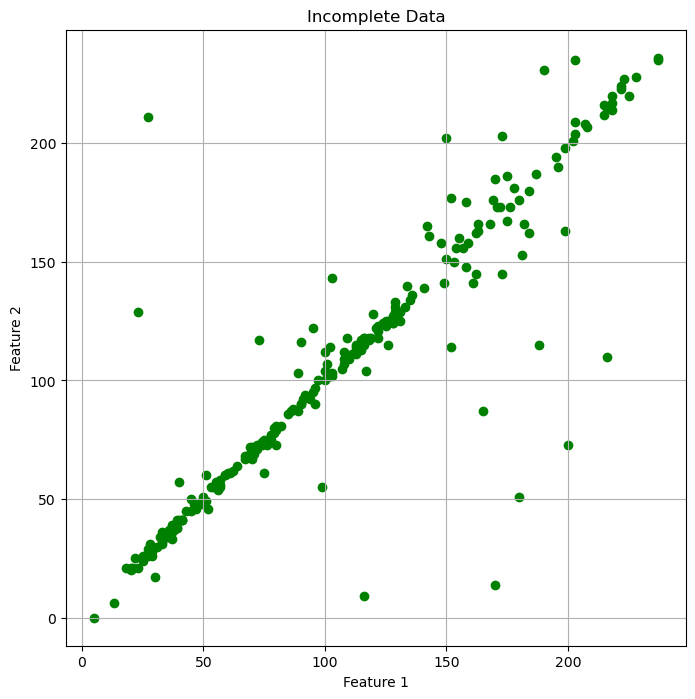

In [45]:
# Code to analyzed incomplete data:
incomplete_data = join_image_df.copy()
incomplete_data.iloc[::2, :2] = np.nan

plt.figure(figsize=(8, 8))
plt.scatter(incomplete_data.iloc[:, 0], incomplete_data.iloc[:, 1],color='green')
plt.title('Incomplete Data') 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

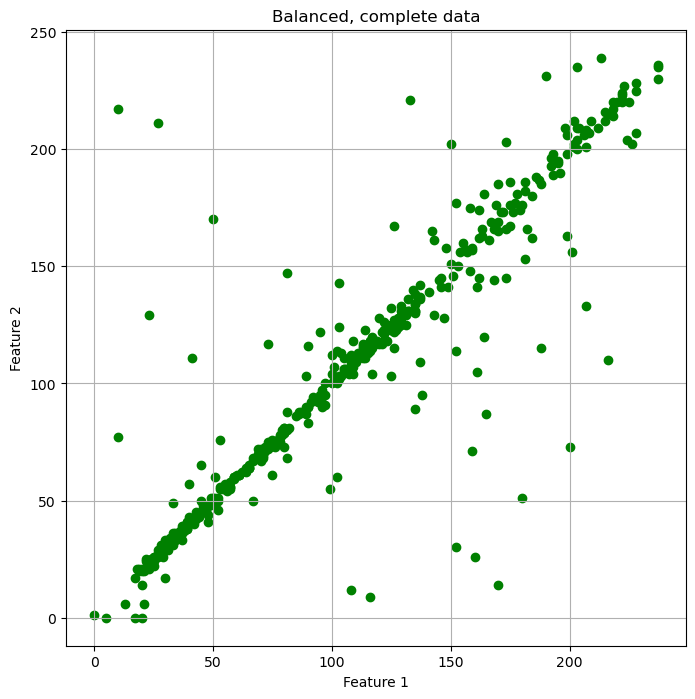

In [46]:
# Code for complete data:
plt.figure(figsize=(8, 8))
plt.scatter(join_image_df.iloc[:, 0], join_image_df.iloc[:, 1],color='green')
plt.title('Balanced, complete data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

**Inaccurate Data:**
- Inaccurate data means the observation are not correct. It means some of the observations are not correctly labeled.

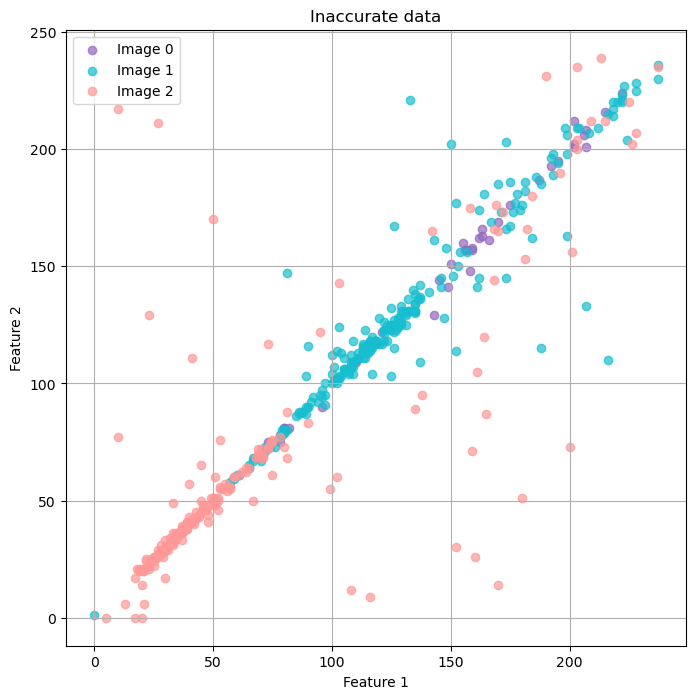

In [47]:
# Code to analyzed inaccurate data:
inaccurate_data = join_image_df.copy()
inaccurate_data.iloc[:100,-1] = 1 #  Making inaccurate data by changing label

colors = ['#9467bd', '#17becf','#ff9896']
plt.figure(figsize=(8, 8))
for label in range(3):
    class_data = inaccurate_data[inaccurate_data.iloc[:, -1] == label]
    plt.scatter(class_data.iloc[:, 0],class_data.iloc[:, 1],label=f'Image {label}', alpha=0.7, color=colors[label])
plt.title('Inaccurate data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

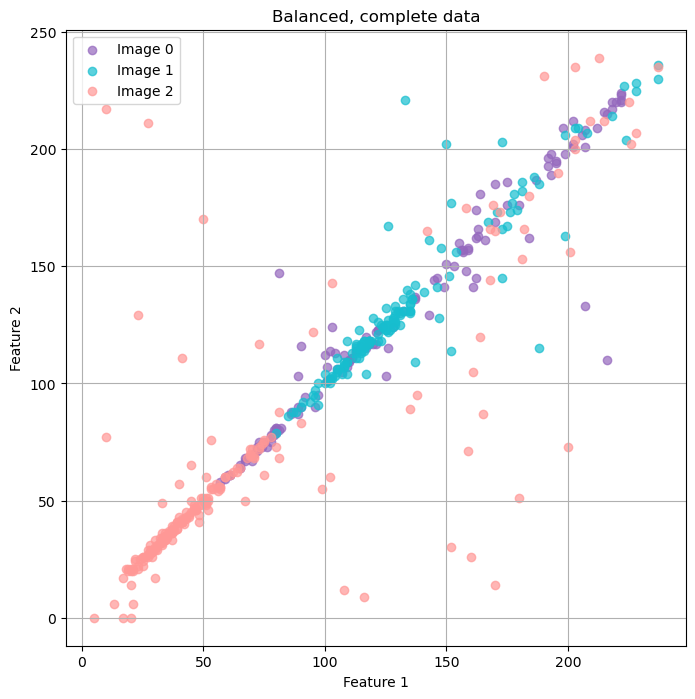

In [48]:
# Code for complete data::
colors = ['#9467bd', '#17becf','#ff9896']
plt.figure(figsize=(8, 8))
for label in range(3):
    class_data = join_image_df[join_image_df.iloc[:, -1] == label]
    plt.scatter(class_data.iloc[:, 0],class_data.iloc[:, 1],label=f'Image {label}', alpha=0.7, color=colors[label])
plt.title('Balanced, complete data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**Is it a trivial data or possibly a big data?**

If the data has complex structure(mixture Gaussian Model), classification of image is difficult and patterns are hidden in the plot then that data is called big data.

Above is the 2D ploting of feature 1 and 2 of image0,image1 and image2. Which show that it's very difficult to find the patterns in this plot. So we can say that it's big data. However, we can find some hidden patterns using standardization, normalization, linear transformation, and orthogonalization over the feature variables.

**Are they high dimensional?**

If n < p, then the data set is said to be high dimensional where n is number of observations and p is number of features.

In [49]:
def high_dimensions(img):
    n=image0_resized.shape[0]
    p=image0_resized.shape[1]
    if(n<p):
        print('It is high dimension')
    else:
        print('It is not high dimension')


print('Image0: ')
high_dimensions(image0_resized)
print('Image1: ')
high_dimensions(image1_resized)
print('Image2: ')
high_dimensions(image2_resized)

Image0: 
It is not high dimension
Image1: 
It is not high dimension
Image2: 
It is not high dimension


**Do you need to standardize?**

Standardization is the process of transforming features to have a **mean of 0** and a **standard deviation of 1**. It centers the data around zero and scales it to have unit variance.

In [50]:
from sklearn.preprocessing import StandardScaler

def standardize_image(image):
    # Flatten the image, standardize, and reshape it back
    scaler = StandardScaler()
    flat_image = image.ravel().reshape(-1, 1)
    standardized_flat_image = scaler.fit_transform(flat_image)
    return standardized_flat_image.reshape(image.shape)

image0_standardized = standardize_image(image0_resized)
image1_standardized = standardize_image(image1_resized)
image2_standardized = standardize_image(image2_resized)

print(f'Standardized image0 mean: {np.mean(image0_standardized)}')
print(f'Standardized image0 std dev: {np.std(image0_standardized)}')
print(f'Standardized image1 mean: {np.mean(image1_standardized)}')
print(f'Standardized image1 std dev: {np.std(image1_standardized)}')
print(f'Standardized image2 mean: {np.mean(image2_standardized)}')
print(f'Standardized image2 std dev: {np.std(image2_standardized)}')

Standardized image0 mean: 9.868649107779169e-17
Standardized image0 std dev: 1.0
Standardized image1 mean: -3.700743415417188e-17
Standardized image1 std dev: 1.0
Standardized image2 mean: -5.978123978750843e-17
Standardized image2 std dev: 1.0


- The standardized means for image0, image1, and image2 are very close to zero, as approximately 0.
- This indicates that the average pixel value across each of the images has been shifted to the center of the distribution.

**Do you need to normalize?**

Normalization scales the data between 0 and 1 or another range. It ensures that all features have a similar influence on the model, regardless of their original scales.

In [51]:
image0_normalize = cv2.normalize(image0_resized.astype('float'), None, 0.0, 1.0,
cv2.NORM_MINMAX)
print('image0:',image0_normalize)
image1_normalize = cv2.normalize(image1_resized.astype('float'), None, 0.0, 1.0,
cv2.NORM_MINMAX)
print('image1:',image1_normalize)
image2_normalize = cv2.normalize(image2_resized.astype('float'), None, 0.0, 1.0,
cv2.NORM_MINMAX)
print('image2:',image2_normalize)


image0: [[0.03608247 0.04123711 0.03608247 ... 0.07216495 0.07731959 0.07731959]
 [0.04123711 0.03608247 0.04123711 ... 0.07216495 0.07731959 0.07216495]
 [0.04639175 0.04123711 0.04639175 ... 0.07731959 0.07731959 0.07731959]
 ...
 [0.64948454 0.6443299  0.6443299  ... 0.75257732 0.75773196 0.7628866 ]
 [0.65463918 0.65463918 0.64948454 ... 0.7371134  0.75773196 0.7628866 ]
 [0.65979381 0.65979381 0.64948454 ... 0.7371134  0.75257732 0.75773196]]
image1: [[0.19444444 0.19444444 0.19444444 ... 0.12777778 0.12222222 0.11111111]
 [0.18888889 0.19444444 0.19444444 ... 0.13888889 0.12777778 0.12222222]
 [0.18333333 0.19444444 0.19444444 ... 0.14444444 0.13888889 0.12777778]
 ...
 [0.43333333 0.43333333 0.46111111 ... 0.61666667 0.58888889 0.59444444]
 [0.44444444 0.45       0.46111111 ... 0.62777778 0.59444444 0.58888889]
 [0.44444444 0.46111111 0.45555556 ... 0.62222222 0.59444444 0.59444444]]
image2: [[0.14901961 0.15294118 0.14901961 ... 0.22745098 0.22352941 0.22745098]
 [0.14901961 0.

- Normalization would involve scaling image0, image1 and image2 to a common range, such as [0, 1]. This ensures that both features contribute equally to the model, regardless of their original magnitudes.
- Normalization prevents features with larger scales from dominating the model's training process and biases. It ensures that all features are treated equally and prevents numerical instabilities during optimization. Normalized features lead to more stable and efficient learning algorithms.

# Task 9

In [53]:
image0_df=pd.DataFrame(image0_vectors)
df.to_csv('image0.csv', index=False)
print('image0: ',image0_df.shape)

image1_df=pd.DataFrame(image1_vectors)
df.to_csv('image1.csv', index=False)
print('image1: ',image1_df.shape)

image2_df=pd.DataFrame(image2_vectors)
df.to_csv('image2.csv', index=False)
print('image2: ',image2_df.shape)

image0:  (144, 257)
image1:  (144, 257)
image2:  (208, 257)


`Merge the feature vectors in image0.csv and image1.csv to create a feature space for these images. Each feature and label columns must align vertically to generate the correct feature space for these image classes. Name the feature space file (spreadsheet) as image01.csv.`

In [54]:
image01_feature_vector=image0_vectors+image1_vectors
image01_df=pd.DataFrame(image01_feature_vector)
image01_df.to_csv('image01.csv', index=False)
image01_df.shape
#image01_df

(288, 257)

`Similarly merge the feature vectors in image0.csv, image1.csv, and image2.csv to create a feature space for these images. Each feature and label columns must align vertically to generate the correct feature space for these three classes. Name the feature space file (spreadsheet) as image012.csv.`

In [55]:
image012_feature_vector=image0_vectors+image1_vectors+image2_vectors
image012_df=pd.DataFrame(image012_feature_vector)
image012_df.to_csv('image012.csv', index=False)
image012_df.shape
#image012_df

(496, 257)

`Randomize the placement of the feature vectors in the files image01.csv and image012.csv files. Note that you don’t randomize the content of a feature vector, but the placement (rows) of the csv files. You can now see the labels are randomized and it will help the training of ML in the later assignment goals.`

In [56]:
index=np.arange(len(image01_df))
random_merged=np.random.permutation(index)
random_merged_image01=image01_df.sample(frac=1).reset_index(drop=True)
print(random_merged_image01.shape)
random_merged_image01.to_csv('random_merged_image01.csv')
#random_merged_image01.head(5)

index=np.arange(len(image012_df))
random_merged=np.random.permutation(index)
random_merged_image012=image012_df.sample(frac=1).reset_index(drop=True)
print(random_merged_image012.shape)
random_merged_image012.to_csv('random_merged_image012.csv')

(288, 257)
(496, 257)


# Task 10

`Select two features and plot the two-dimensional feature space with labeling the observations (vectors) of the birds that you selected by using the spreadsheets that you generated.`

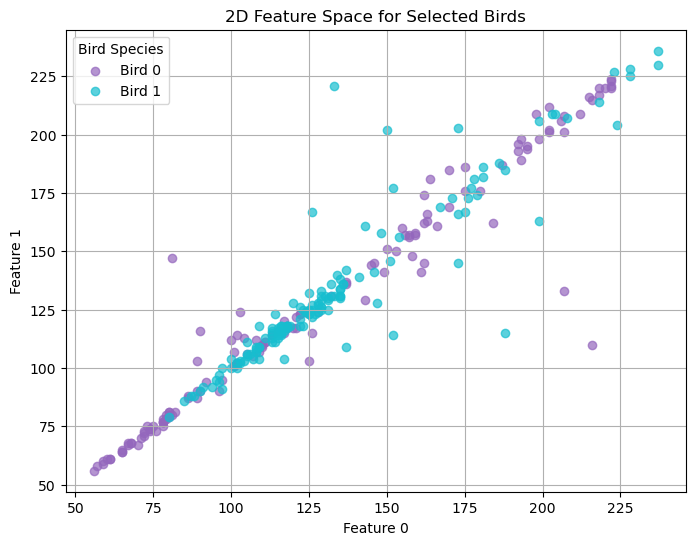

In [57]:
df = pd.read_csv('image01.csv')
colors = ['#9467bd', '#17becf']
feature_x = df.iloc[:, 0]  # First feature
feature_y = df.iloc[:, 1]   # Second feature
labels = df.iloc[:, -1]    # Label column

plt.figure(figsize=(8, 6))

for label in labels.unique():
    plt.scatter(feature_x[labels == label], feature_y[labels == label], label=f'Bird {label}', alpha=0.7,color=colors[label])

plt.title('2D Feature Space for Selected Birds')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Bird Species')
plt.grid(True)
plt.show()


`Select three features and plot the three-dimensional feature space with labeling the observations (vectors) of the birds that you selected by using the spreadsheets that you generated.`

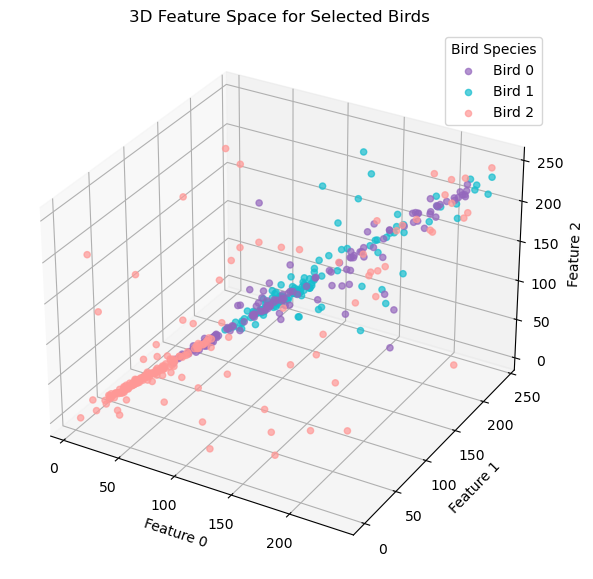

In [58]:
df = pd.read_csv('image012.csv')
colors = ['#9467bd', '#17becf','#ff9896']
feature_x = df.iloc[:, 0]  # First feature
feature_y = df.iloc[:, 1]  # Second feature 
feature_z = df.iloc[:, 2]  # Third feature
labels = df.iloc[:, -1]    # Label column 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in labels.unique():
    ax.scatter(
        feature_x[labels == label], 
        feature_y[labels == label], 
        feature_z[labels == label], 
        label=f'Bird {label}', alpha=0.7,color=colors[label]
    )

ax.set_title('3D Feature Space for Selected Birds')
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.legend(title='Bird Species')
plt.show()


`Discuss these figures and describe your observations in terms of their separable features.`

**2D Feature Space (First Image):**
- The 2D scatter plot shows a significant overlap between the two bird species (Bird 0 and Bird 1) based on the chosen features (Feature 0 and Feature 1). This overlap indicates that the selected features alone may not be enough to distinguish between the two bird species effectively.
- The scatter points seem to align along a diagonal axis, suggesting that there is some correlation between Feature 0 and Feature 1. Both bird species follow a similar linear pattern, further complicating classification based on these two features alone.
- The plot shows that in some regions, especially in the central portion of the scatter plot, it would be difficult to classify the bird species based on these features due to high overlap.

**3D Feature Space (Second Image):**
- Introducing a third feature (Feature 2) slightly improves the separation of the bird species. While Bird 0 and Bird 1 still overlap, there is better visual differentiation compared to the 2D plot. The inclusion of Bird 2 (the green points) adds a new class, which is more spread out and distinct.
- In 3D space, you can observe that Bird 2 is more separable due to the variation in Feature 2, and its points are more dispersed compared to the other two bird species. The added dimension helps in visualizing a bit more variance among the species, especially for Bird 2.
- Despite the third dimension, Bird 0 and Bird 1 still exhibit significant overlap, which indicates that additional or more discriminative features might be needed for clearer separation between these two classes.

# Task 11

`Make appropriate changes to your Python code such that it can read any number of images from a folder that consists of many similar images, generate a feature space/s, and a spreadsheet/s for the feature spaces!`

In [63]:
import os
def resize_image(img, target_height=256, interpolation=cv2.INTER_CUBIC):
    original_h, original_w = img.shape  
    aspect_ratio = original_w / original_h  
    new_width = int(target_height * aspect_ratio)  
    new_width = new_width - (new_width % 16) 
    resized_image = cv2.resize(img, (new_width, target_height), interpolation=interpolation)  
    return resized_image


def image_to_featureVectors(img, label, block_size=16):
    h, w = img.shape
    feature_vectors = []
    
    for r in range(0, h, block_size):
        for c in range(0, w, block_size):
            block = img[r:r + block_size, c:c + block_size]
            if block.shape == (block_size, block_size):  
                feature_vector = block.flatten() 
                feature_vectors.append(np.append(feature_vector, label))  
    return feature_vectors


def process_images_from_folder(folder_path, output_csv='folder_feature_vectors.csv', target_height=256, block_size=16):
    all_feature_vectors = []
    label = 0 
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.png', '.jpg', '.jpeg')):  
            file_path = os.path.join(folder_path, file_name)
            
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print("Warning: Error! Not able to read images")
                continue

            img_resized = resize_image(img, target_height=target_height)
            image_vectors = image_to_featureVectors(img_resized, label, block_size)
            all_feature_vectors.extend(image_vectors)
            
            label += 1  # Increment the label
    
    # Convert the list of feature vectors into a DataFrame
    df = pd.DataFrame(all_feature_vectors)
    print(df.shape)
    #print(df.head(5))
    
    df.to_csv(output_csv, index=False)
    print(f"Feature vectors saved to {output_csv}")

folder_path = 'C:/Users/saksh/Pictures/Images'  # change the folder path before run this code
output_csv = 'folder_feature_vectors.csv'

# Process all images in the folder
process_images_from_folder(folder_path, output_csv=output_csv, target_height=256, block_size=16)


(752, 257)
Feature vectors saved to folder_feature_vectors.csv


# Task 12

`Describe the effects of block size on the dimensionality of the feature space and the number of vectors in the domain. Also, describe how these effects may influence the classifier that divides the domain.`

### A. Impact of Block Size on Vector Count and Feature Space Dimensionality

The choice of block size plays a key role in shaping the **dimensionality of the feature space** and the **number of vectors** that represent the data. When transforming raw data into a feature space, block size directly affects how the data is divided, influencing both the complexity and the performance of classifiers. This section explores how varying block sizes impact the feature space and the classifiers' functionality within it.

### B. Dimensionality of the Feature Space

The dimensionality of the generated feature space is highly dependent on the selected block size. Larger block sizes tend to capture more complex, detailed representations of the data, revealing finer patterns. However, this also results in **higher dimensionality**, which can cause problems such as increased computational demands and the "curse of dimensionality" (where too many dimensions complicate analysis). 

Conversely, smaller block sizes produce simpler, lower-dimensional representations, which may be easier to compute but can miss important details in the data. 

Choosing the right block size involves finding a balance between capturing enough detail for the task (such as classification or regression) and ensuring that the computational load remains manageable. The choice should be informed by the characteristics of the dataset and the specific goals of the analysis.

### C. Number of Vectors in the Feature Space

The number of vectors that represent the data in the feature space is also influenced by block size. **Larger blocks** cover more area, resulting in fewer but broader vectors. This reduces the total number of vectors but may fail to capture finer variations in the data. **Smaller blocks**, on the other hand, increase the number of vectors, allowing for a more detailed representation of the data but potentially introducing noise or redundancy.

The number of vectors is important because it affects the classifier’s ability to interpret and process the data. Too few vectors may cause the classifier to miss subtle patterns, while too many vectors may lead to overfitting or inefficiencies due to noise.

### D. Impact on the Classifier

The choice of block size has a significant impact on the **classifier's performance**. A classifier trained on a **high-dimensional feature space** (resulting from larger block sizes) may be more sensitive to changes in the data and can capture finer details, but it is also at higher risk of overfitting. In contrast, a classifier operating in a **lower-dimensional feature space** (from smaller block sizes) may be more stable but might overlook important nuances in the data.

Additionally, the block size affects more than just model complexity; it also influences computational efficiency and generalization ability. Selecting the optimal block size ensures that the classifier can balance **accuracy** and **efficiency**, aligning with the task's goals and the data's inherent characteristics.
